## 다변수 선형회귀: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
from IPython.display import display, Image
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## (1) 데이터 가져오기

In [3]:
# 우리가 오늘 사용해 볼 당뇨병 데이터 가져오기
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

dataset = load_diabetes()
df_X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_y = pd.Series(dataset.target)

In [4]:
# 데이터 shape 확인하기
print(dataset.data.shape)

(442, 10)


In [5]:
# 데이터 확인하기 
series = pd.Series(dataset.target, name='label')
pd.concat([df_X, series],axis=1).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## (2) 모델에 입력할 데이터 X 준비하기
### df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [6]:
X = df_X.values
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## (3) 모델에 예측할 데이터 y 준비하기
### df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [7]:
y = df_y.values
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## (4) train 데이터와 test 데이터로 분리하기
### X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [8]:
# 데이터를 train 데이터와 test 데이터로 분리한다.
# 모델이 일정량의 데이터로 학습한 뒤 그 모델을 공정하게 평가하기 위해서는 학습 과정에서 보지 못했던 데이터를 이용해야 한다.
# sklearn 라이브러리에 내장되어 있는 train_test_split을 활용해 데이터를 분리해 보도록 하겠다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.shape[1])

(353, 10) (353,)
(89, 10) (89,)
10


## (5) 모델 준비하기
### 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
### 모델 함수를 구현해주세요.

In [9]:
# W와 b는 랜덤한 값으로 초기값을 설정해주도록 하겠습니다. W 또한 벡터이므로 대문자를 사용합니다.
# 길이가 10인 W와 1개의 숫자인 b를 준비합니다.
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

In [10]:
W

array([0.26913279, 0.55690645, 0.54697492, 0.97826152, 0.202617  ,
       0.50142638, 0.90507233, 0.95010158, 0.46250543, 0.50394351])

In [11]:
b

0.4959817290668542

In [12]:
# 따라서 for 구문을 활용해 1부터 12까지 x * w를 수행하고, 마지막에 b를 더해주도록 하겠습니다.
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기
### 손실함수를 MSE 함수로 정의해주세요.

In [13]:
# 손실함수는 이번에는 RMSE 대신 MSE를 사용해 보겠다. 
# 이전에 사용했던 RMSE는 단지 MSE의 제곱근이었으므로, 이번에는 제곱근하는 과정만 빼면 된다.
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [14]:
# 손실함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기
### 기울기를 계산하는 gradient 함수를 구현해주세요.

In [15]:
# MSE Loss에 대해 미분 공식을 활용해서 직접 그래디언트 수식을 구하고 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터의 개수
    N = len(X)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
len(X)

442

In [16]:
# 한번 실험삼아 경사(gradient)를 계산해 볼까요?
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37023652 -0.31041792 -4.28849592 -3.22497143 -1.54377566 -1.26649727
  2.88837785 -3.14455377 -4.13649935 -2.7934476 ]
db: -303.27500486765814


## (8) 하이퍼 파라미터인 학습률 설정하기
### 학습률, learning rate 를 설정해주세요
### 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

### 직접 구현한 손실함수, 기울기 함수를 활용해 경사하강법으로 모델 학습하기

In [17]:
# 학습률을 0.0001로 두겠습니다.
LEARNING_RATE = 0.1

In [18]:
# gradient를 구하고, W와 b를 업데이트하고, 손실함수를 기록합니다.

losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6059.3282
Iteration 20 : Loss 5762.9280
Iteration 30 : Loss 5692.0487
Iteration 40 : Loss 5622.1319
Iteration 50 : Loss 5553.9938
Iteration 60 : Loss 5487.9372
Iteration 70 : Loss 5423.9327
Iteration 80 : Loss 5361.9151
Iteration 90 : Loss 5301.8172
Iteration 100 : Loss 5243.5740
Iteration 110 : Loss 5187.1225
Iteration 120 : Loss 5132.4021
Iteration 130 : Loss 5079.3542
Iteration 140 : Loss 5027.9224
Iteration 150 : Loss 4978.0519
Iteration 160 : Loss 4929.6903
Iteration 170 : Loss 4882.7866
Iteration 180 : Loss 4837.2919
Iteration 190 : Loss 4793.1589
Iteration 200 : Loss 4750.3418
Iteration 210 : Loss 4708.7967
Iteration 220 : Loss 4668.4808
Iteration 230 : Loss 4629.3533
Iteration 240 : Loss 4591.3744
Iteration 250 : Loss 4554.5059
Iteration 260 : Loss 4518.7108
Iteration 270 : Loss 4483.9536
Iteration 280 : Loss 4450.1998
Iteration 290 : Loss 4417.4162
Iteration 300 : Loss 4385.5707
Iteration 310 : Loss 4354.6325
Iteration 320 : Loss 4324.5716
Iteration 330 : L

Iteration 3350 : Loss 2939.9166
Iteration 3360 : Loss 2939.5046
Iteration 3370 : Loss 2939.0965
Iteration 3380 : Loss 2938.6922
Iteration 3390 : Loss 2938.2917
Iteration 3400 : Loss 2937.8951
Iteration 3410 : Loss 2937.5022
Iteration 3420 : Loss 2937.1130
Iteration 3430 : Loss 2936.7275
Iteration 3440 : Loss 2936.3457
Iteration 3450 : Loss 2935.9674
Iteration 3460 : Loss 2935.5928
Iteration 3470 : Loss 2935.2216
Iteration 3480 : Loss 2934.8540
Iteration 3490 : Loss 2934.4898
Iteration 3500 : Loss 2934.1291
Iteration 3510 : Loss 2933.7717
Iteration 3520 : Loss 2933.4177
Iteration 3530 : Loss 2933.0671
Iteration 3540 : Loss 2932.7197
Iteration 3550 : Loss 2932.3756
Iteration 3560 : Loss 2932.0348
Iteration 3570 : Loss 2931.6971
Iteration 3580 : Loss 2931.3627
Iteration 3590 : Loss 2931.0313
Iteration 3600 : Loss 2930.7031
Iteration 3610 : Loss 2930.3779
Iteration 3620 : Loss 2930.0558
Iteration 3630 : Loss 2929.7368
Iteration 3640 : Loss 2929.4207
Iteration 3650 : Loss 2929.1075
Iteratio

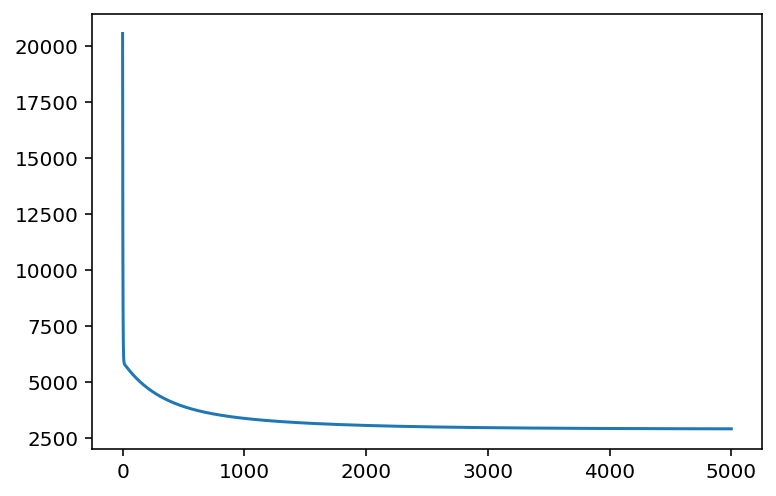

In [19]:
# 손실함수를 그려보자
plt.plot(losses)
plt.show()

In [20]:
# W와 b의 값과 최종 loss값을 확인해보자
W, b, losses[-1]

(array([  41.78814138, -203.27072082,  509.48356369,  325.17052839,
         -71.14947094, -119.25343051, -215.79269879,  144.92814004,
         376.43002387,  111.9733713 ]),
 151.37299101043428,
 2905.060692582864)

## (9) 모델 학습하기
### 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
### loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
### 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [21]:
# 다중 공선성 제거 후 학습해보기
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif['Feature'] = df_X.columns
vif

,VIF_Factor,Feature
0,1.217307,age
1,1.278073,sex
2,1.509446,bmi
3,1.459429,bp
4,59.203786,s1
5,39.194379,s2
6,15.402352,s3
7,8.890986,s4
8,10.076222,s5
9,1.484623,s6


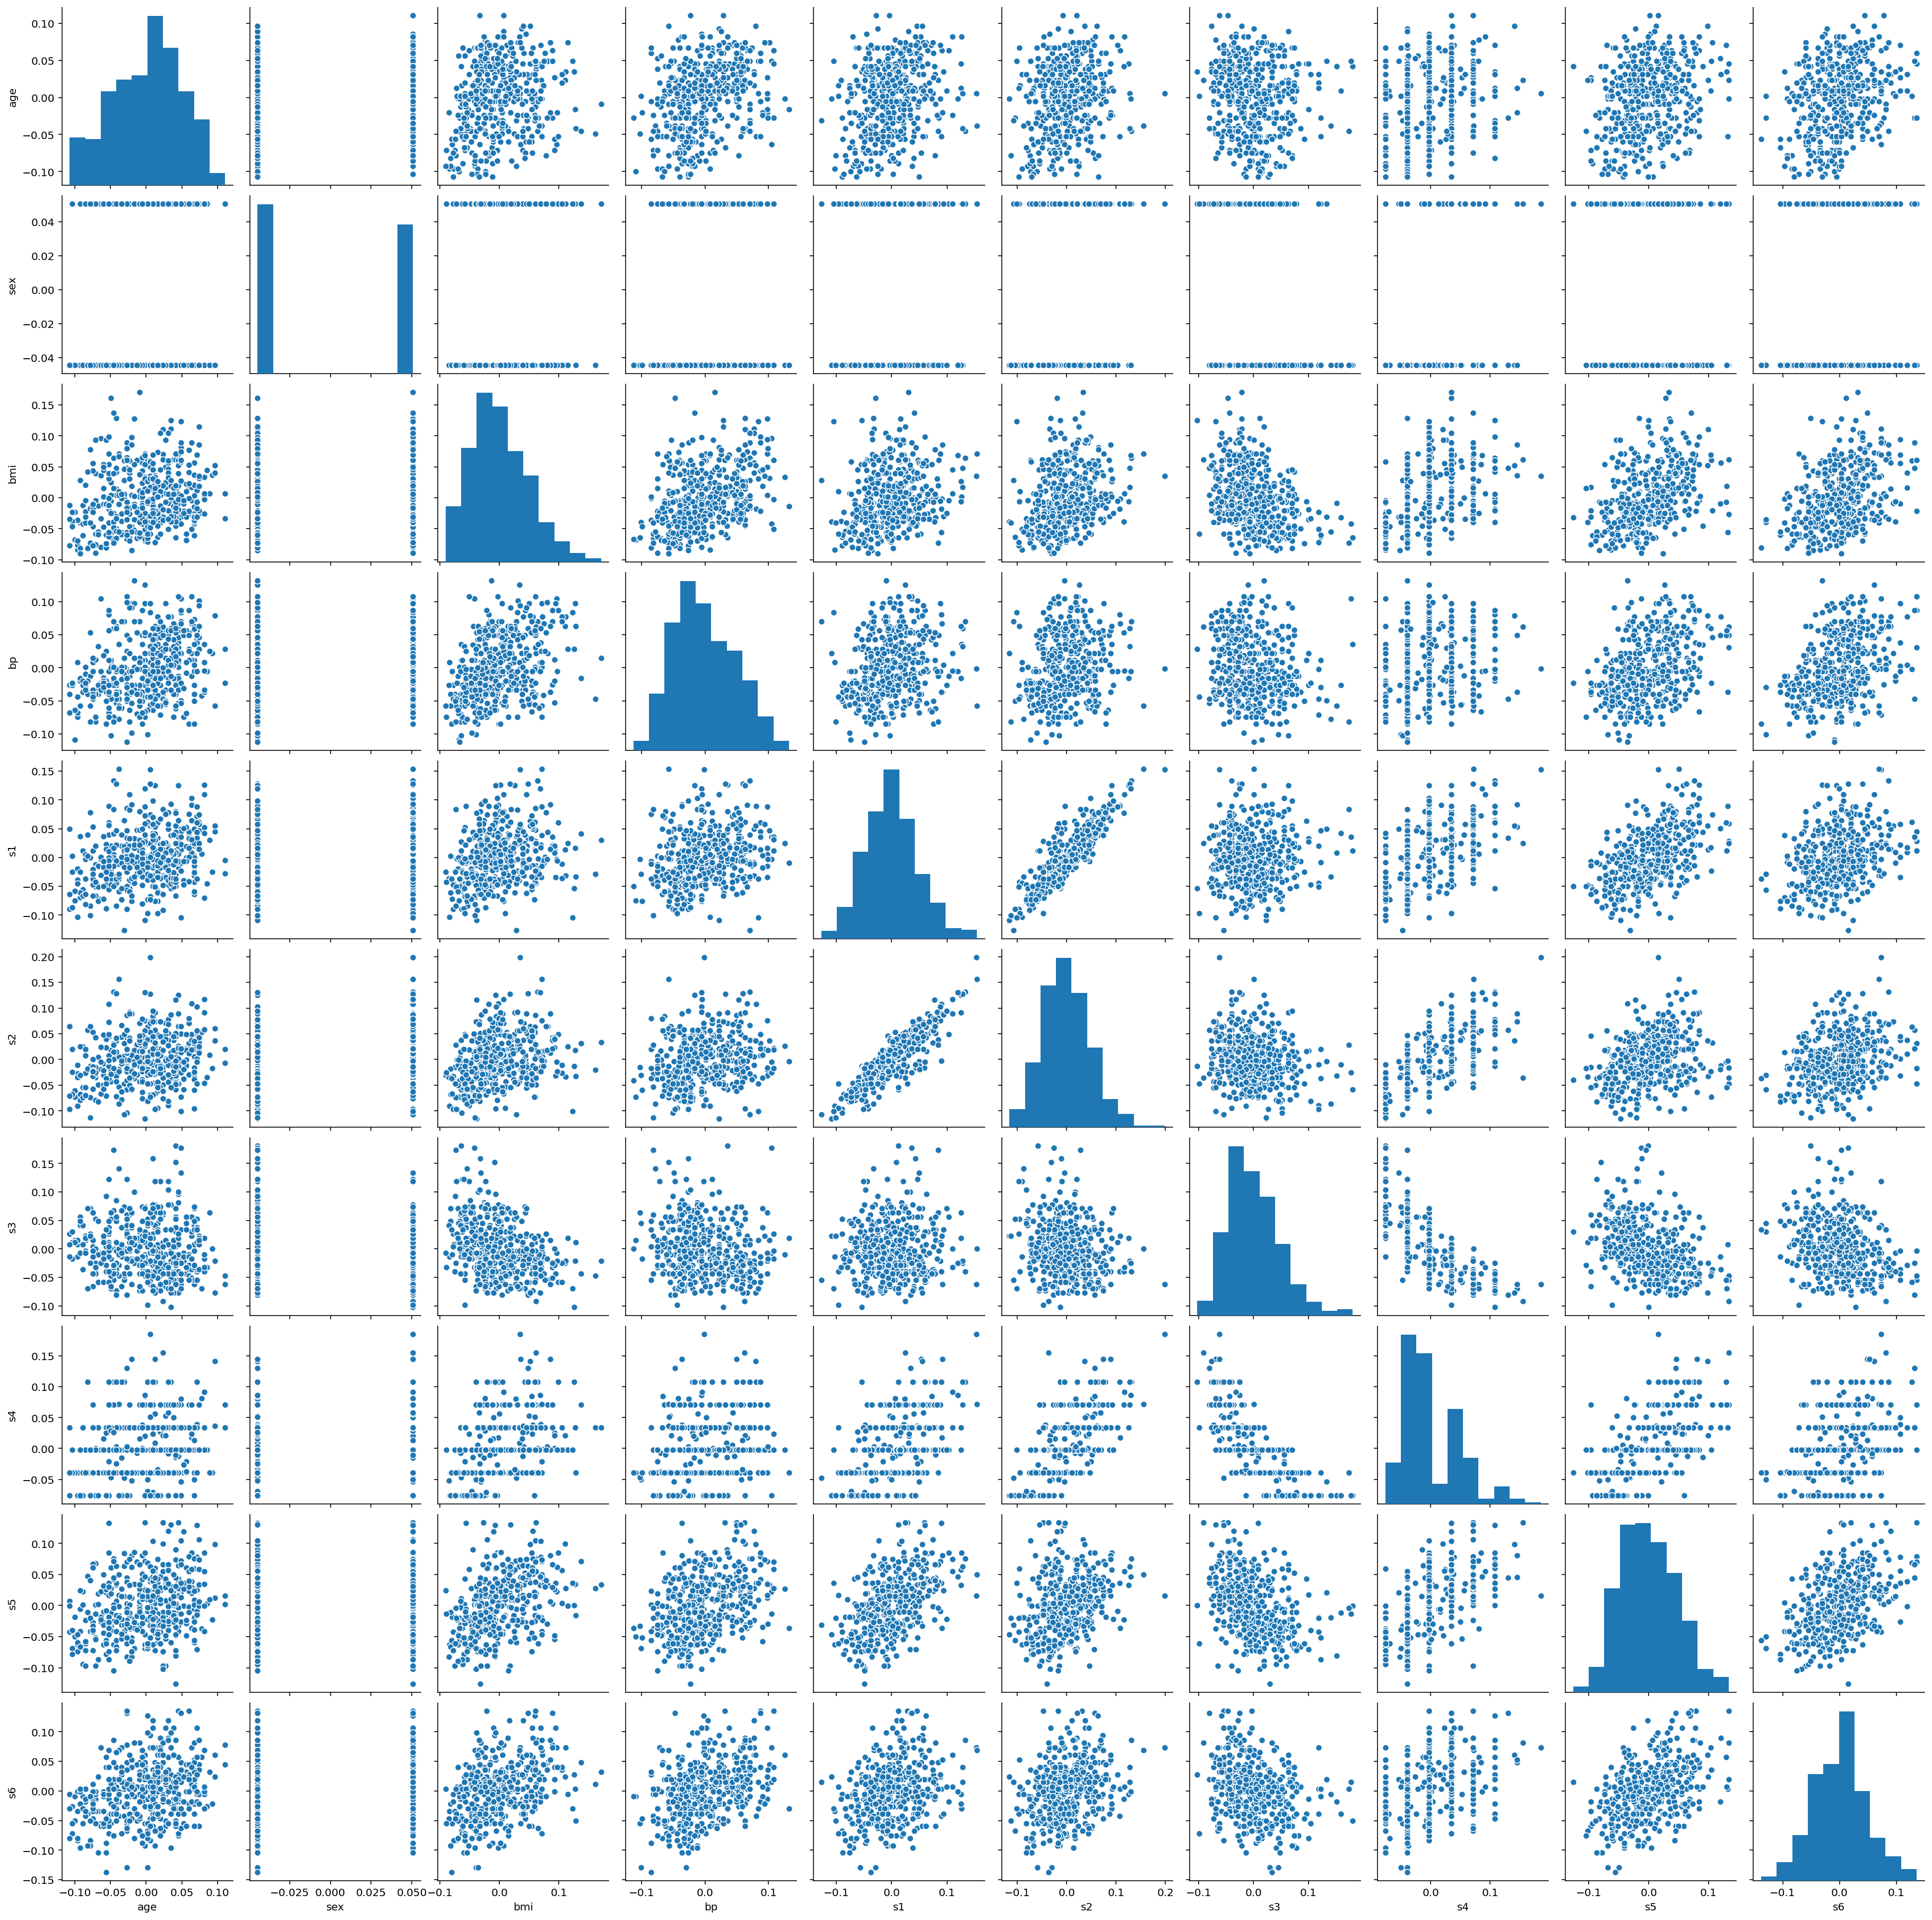

In [23]:
# pairplot
sns.pairplot(df_X)

In [24]:
# 다중공선성이 높은 컬럼을 제거해 보기
# s1과 s2의 상관관계가 너무 높아서 s1을 제거하고 진행해 보겠다
X = df_X.drop('s1',axis=1).values
y = df_y.values

In [25]:
# 데이터를 train 데이터와 test 데이터로 분리한다.
# 모델이 일정량의 데이터로 학습한 뒤 그 모델을 공정하게 평가하기 위해서는 학습 과정에서 보지 못했던 데이터를 이용해야 한다.
# sklearn 라이브러리에 내장되어 있는 train_test_split을 활용해 데이터를 분리해 보도록 하겠다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 9) (353,)
(89, 9) (89,)


In [26]:
# W와 b는 랜덤한 값으로 초기값을 설정해주도록 하겠습니다. W 또한 벡터이므로 대문자를 사용합니다.
# 길이가 10인 W와 1개의 숫자인 b를 준비합니다.
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

In [27]:
X_train.shape[1]

9

In [28]:
# 따라서 for 구문을 활용해 1부터 12까지 x * w를 수행하고, 마지막에 b를 더해주도록 하겠습니다.
def model(X, W, b):
    predictions = 0
    for i in range(X_train.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [29]:
# 손실함수는 이번에는 RMSE 대신 MSE를 사용해 보겠다. 
# 이전에 사용했던 RMSE는 단지 MSE의 제곱근이었으므로, 이번에는 제곱근하는 과정만 빼면 된다.
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [30]:
# 손실함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [31]:
# MSE Loss에 대해 미분 공식을 활용해서 직접 그래디언트 수식을 구하고 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터의 개수
    N = len(X)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
len(X)

442

In [32]:
# 한번 실험삼아 경사(gradient)를 계산해 볼까요?
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.3718793  -0.31260459 -4.29010904 -3.22772192 -1.26801277  2.88904089
 -3.14593618 -4.13683637 -2.79376104]
db: -303.87698537120434


In [33]:
# 학습률을 0.0001로 두겠습니다.
LEARNING_RATE = 0.1

In [34]:
# gradient를 구하고, W와 b를 업데이트하고, 손실함수를 기록합니다.

losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6063.6988
Iteration 20 : Loss 5768.2117
Iteration 30 : Loss 5699.0096
Iteration 40 : Loss 5630.5829
Iteration 50 : Loss 5563.7535
Iteration 60 : Loss 5498.8365
Iteration 70 : Loss 5435.8139
Iteration 80 : Loss 5374.6312
Iteration 90 : Loss 5315.2317
Iteration 100 : Loss 5257.5599
Iteration 110 : Loss 5201.5621
Iteration 120 : Loss 5147.1864
Iteration 130 : Loss 5094.3823
Iteration 140 : Loss 5043.1011
Iteration 150 : Loss 4993.2956
Iteration 160 : Loss 4944.9200
Iteration 170 : Loss 4897.9301
Iteration 180 : Loss 4852.2830
Iteration 190 : Loss 4807.9372
Iteration 200 : Loss 4764.8524
Iteration 210 : Loss 4722.9898
Iteration 220 : Loss 4682.3117
Iteration 230 : Loss 4642.7814
Iteration 240 : Loss 4604.3637
Iteration 250 : Loss 4567.0243
Iteration 260 : Loss 4530.7301
Iteration 270 : Loss 4495.4490
Iteration 280 : Loss 4461.1498
Iteration 290 : Loss 4427.8024
Iteration 300 : Loss 4395.3777
Iteration 310 : Loss 4363.8474
Iteration 320 : Loss 4333.1842
Iteration 330 : L

Iteration 4110 : Loss 2920.1464
Iteration 4120 : Loss 2919.9159
Iteration 4130 : Loss 2919.6873
Iteration 4140 : Loss 2919.4608
Iteration 4150 : Loss 2919.2361
Iteration 4160 : Loss 2919.0134
Iteration 4170 : Loss 2918.7927
Iteration 4180 : Loss 2918.5738
Iteration 4190 : Loss 2918.3568
Iteration 4200 : Loss 2918.1417
Iteration 4210 : Loss 2917.9284
Iteration 4220 : Loss 2917.7170
Iteration 4230 : Loss 2917.5074
Iteration 4240 : Loss 2917.2996
Iteration 4250 : Loss 2917.0936
Iteration 4260 : Loss 2916.8893
Iteration 4270 : Loss 2916.6869
Iteration 4280 : Loss 2916.4861
Iteration 4290 : Loss 2916.2871
Iteration 4300 : Loss 2916.0899
Iteration 4310 : Loss 2915.8943
Iteration 4320 : Loss 2915.7004
Iteration 4330 : Loss 2915.5082
Iteration 4340 : Loss 2915.3177
Iteration 4350 : Loss 2915.1288
Iteration 4360 : Loss 2914.9415
Iteration 4370 : Loss 2914.7559
Iteration 4380 : Loss 2914.5718
Iteration 4390 : Loss 2914.3894
Iteration 4400 : Loss 2914.2085
Iteration 4410 : Loss 2914.0292
Iteratio

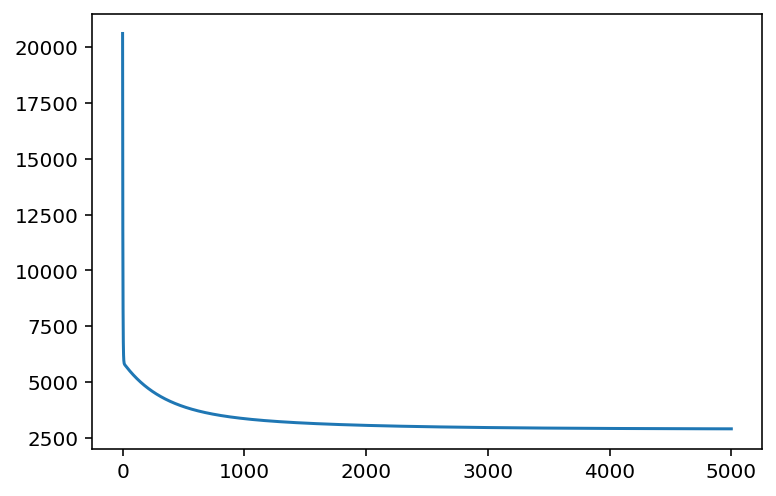

In [35]:
# 손실함수를 그려보자
plt.plot(losses)
plt.show()

In [36]:
# W와 b의 값과 최종 loss값을 확인해보자
W, b, losses[-1]

(array([  36.99135013, -200.68723145,  507.10950695,  322.02215127,
        -146.70819924, -226.00020139,  133.49257306,  364.66074301,
         107.63308785]),
 151.42140568455272,
 2905.803970680806)

## (10) test 데이터에 대한 성능 확인하기
### test 데이터에 대한 성능을 확인했는데, 손실함수 값이 더 줄어든 것을 확인할 수 있었다

In [37]:
# 학습때 보지 않은 test 데이터에 대해서는 loss값이 얼마나 될까요? 
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2834.453872097449

## (11) 정답 데이터와 예측한 데이터 시각화하기
### x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

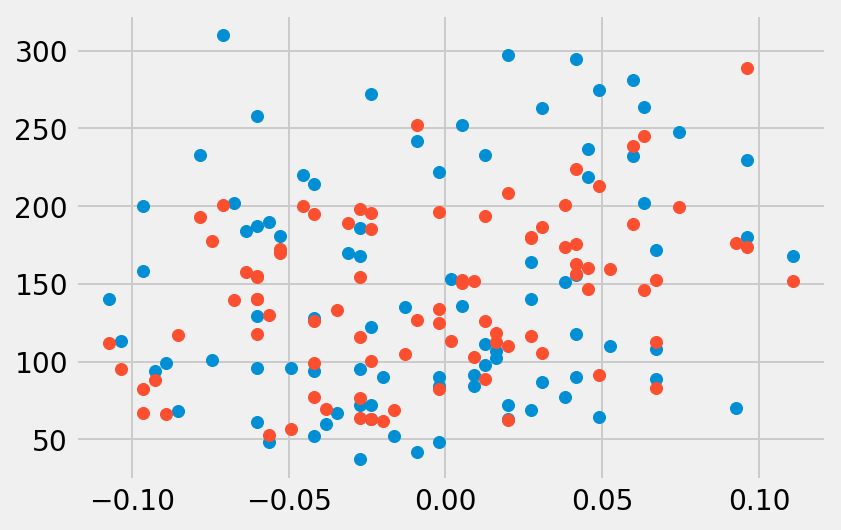

In [38]:
# 마지막으로 우리의 모델이 예측한 prediction과 실제 정답인 y_test를 비교해서 얼마나 잘 맞추었는지 그래프로 확인해 보도록 하겠습니다.
# X_test의 각 행의 첫 번째 데이터가 total_bill이므로, 다음과 같이 시각화를 하면 됩니다.

# 다양한 그래픽 스타일로 연출해보자
plt.style.use('fivethirtyeight') #ggplot, ggplot2, seaborn, seaborn

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## (12) 사이킷런(sklearn) 라이브러리를 활용해서 아주 편리하고 깔끔하게 진행해 보자

In [39]:
# 이제 지금까지 학습한 모든 내용을 사이킷런(sklearn) 라이브러리를 활용해서 아주 편리하고 깔끔하게 진행해 보자

# 우리가 오늘 사용해 볼 당뇨병 데이터 가져오기
# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

dataset = load_diabetes()
df_X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_y = pd.Series(dataset.target)

In [40]:
# X와 y를 준비하자
X = df_X.values
y = df_y.values

In [41]:
## X와 y를 train 데이터와 test 데이터로 분리해 봅시다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 데이터가 준비되었으니 우리는 준비된 모델을 가져다 쓰기만 하면 됩니다.
# 선형회귀 모델은 sklearn.linear_model 안에 LinearRegression 로 내장되어 있습니다.

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [43]:
# 모델 학습은 다음과 같이 입력 데이터에 해당하는 X_train과 정답 데이터에 해당하는 y_train을 넣어 fit 시키면 됩니다.

model.fit(X_train, y_train)

LinearRegression()

In [44]:
# X_test 데이터에 대한 예측을 해 볼까요?

predictions = model.predict(X_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [45]:
# 이제 정답 데이터와 비교해 모델의 성능을 평가해 봅시다.
#모델의 성능은 mse로 계산해 볼텐데, 이는 sklearn.metrics의 mean_squared_error에 들어있습니다.

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

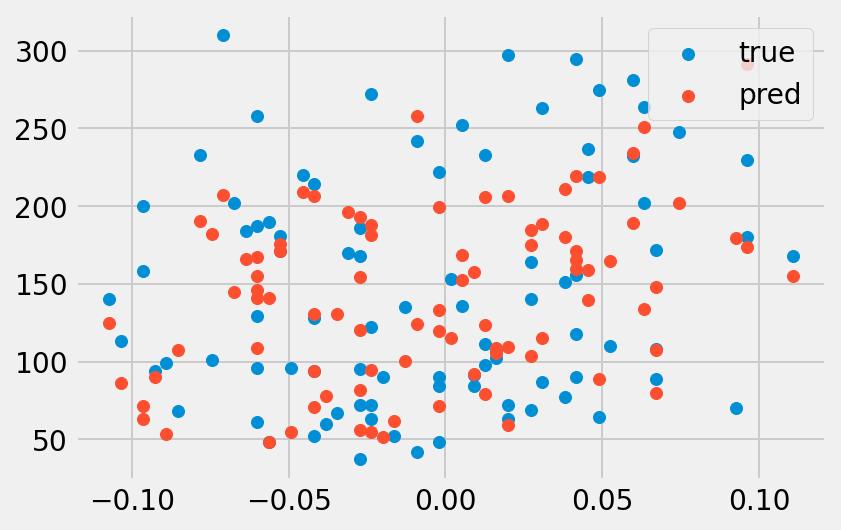

In [46]:
# 위에서 했던 것과 같이 X축에는 total_bill을, y 축에는 tip을 두고 시각화를 해 보겠습니다.

# 다양한 그래픽 스타일로 연출해보자
plt.style.use('fivethirtyeight') #ggplot, ggplot2, seaborn, seaborn

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

## 학습 로그 및 느낀점 정리하기
### 머신러닝 중에서도 "선형 회귀" 문제를 풀어본 소감
### 오늘 배운 내용을 정리하면,
### (1) 입력데이터 X, 정답데이터 y, 모델의 출력인 prediction 개념을 이해하고, 학습시킨다는 철학을 이해했다
### (2) 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류를 알아보았으며 직접 구현해 보았다.
### (3) 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현해 보았다.
### (4) 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익혀보았다.
### (5) 다중공선성이 높은 컬럼을 제거해서 학습해보면서, 손실함수값이 줄어드는지 확인해 보았다.
### (6) 마지막으로는 사이킷런을 활용해서 간편하고 빠르게 선형 회귀를 진행해 보았다.